In [2]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 

In [3]:
(X_train, y_train) , (X_test, y_Test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [6]:
X_train[0].shape

(28, 28)

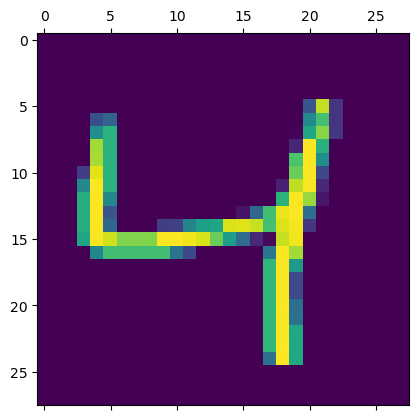

In [7]:
plt.matshow(X_train[2])

In [8]:
X_train_flattened =  X_train.reshape(len(X_train),28*28)
X_test_flattened =  X_test.reshape(len(X_test),28*28)

In [12]:
X_test_flattened = X_test_flattened / 255 
X_train_flattened = X_train_flattened / 255

In [13]:
model =  keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4677 - accuracy: 0.8787
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3034 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2827 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2664 - accuracy: 0.9255


In [15]:
model.evaluate(X_test_flattened, y_Test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2761 - accuracy: 0.9236


[0.2761427164077759, 0.9236000180244446]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted

313/313 [==============================] - 1s 3ms/step


array([[3.2022484e-02, 3.2574738e-07, 4.7260106e-02, ..., 9.9981809e-01,
        7.4538700e-02, 6.1966324e-01],
       [5.0304425e-01, 6.7765550e-03, 9.9942994e-01, ..., 1.4211614e-12,
        1.4096411e-01, 2.4112226e-09],
       [5.2010908e-04, 9.9351710e-01, 5.9191936e-01, ..., 1.2658420e-01,
        3.8972360e-01, 4.7731947e-02],
       ...,
       [8.3692576e-06, 3.8150101e-06, 1.0575374e-03, ..., 2.3089309e-01,
        4.8505250e-01, 8.0542469e-01],
       [3.3484888e-04, 1.6782964e-04, 1.5051602e-04, ..., 6.8211535e-05,
        7.5186968e-01, 1.5217777e-04],
       [2.2846060e-02, 3.6248257e-10, 1.2308668e-01, ..., 5.3667126e-08,
        1.7957625e-04, 4.2493565e-07]], dtype=float32)

In [18]:
np.argmax(y_predicted[1])

2

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
cm = tf.math.confusion_matrix(labels = y_Test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [  11,   10,  915,   21,    6,    2,   13,   12,   38,    4],
       [   4,    0,   14,  935,    0,   20,    2,   11,   17,    7],
       [   3,    1,    6,    2,  883,    0,   13,    8,   11,   55],
       [  13,    3,    2,   42,    4,  769,   12,    8,   32,    7],
       [  13,    3,    6,    1,    7,   12,  912,    2,    2,    0],
       [   1,    6,   20,   12,    1,    1,    0,  959,    2,   26],
       [  11,    8,    7,   32,    8,   23,   10,   12,  855,    8],
       [  11,    7,    1,   12,   12,    6,    0,   30,    4,  926]])>

In [21]:
import seaborn as sn 

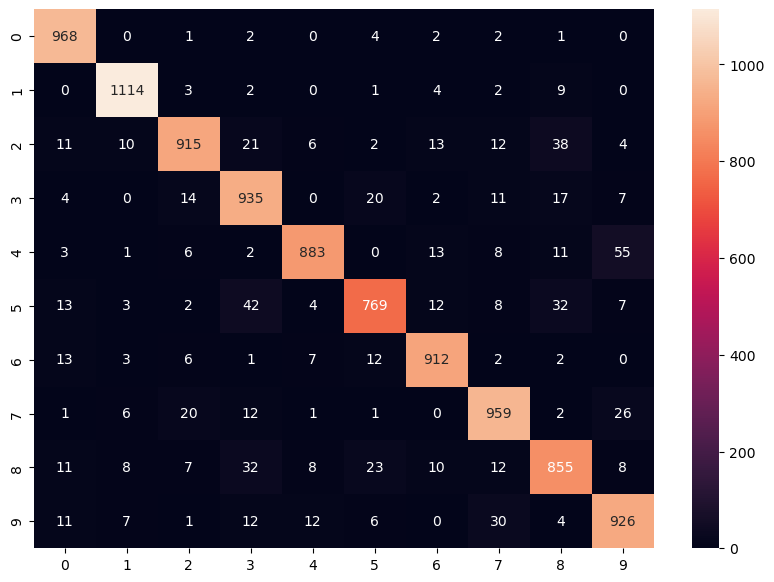

In [22]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel = ('Predicted')
plt.ylabel = ('Truth')

In [23]:
model =  keras.Sequential([
    keras.layers.Dense(100, input_shape= (784, ), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2789 - accuracy: 0.9203
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1266 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0888 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0673 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0536 - accuracy: 0.9834


In [25]:
model.evaluate(X_test_flattened, y_Test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9773


[0.07606951147317886, 0.9772999882698059]

In [ ]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel = ('Predicted')
plt.ylabel = ('Truth')